<a href="https://colab.research.google.com/github/MohdAnasKhan94675/WineClassification/blob/main/WineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib  notebook

In [ ]:
wine = datasets.load_wine()

In [ ]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

# **Train Test Split**

In [ ]:
X = df
y = df.pop("target")

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
y.unique()

array([0, 1, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

In [ ]:
X_train.shape

(142, 13)

In [ ]:
X_test.shape

(36, 13)

# **Train Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8333333333333334

# **Turning Sensitivity Of Model to `n_neighbors`**

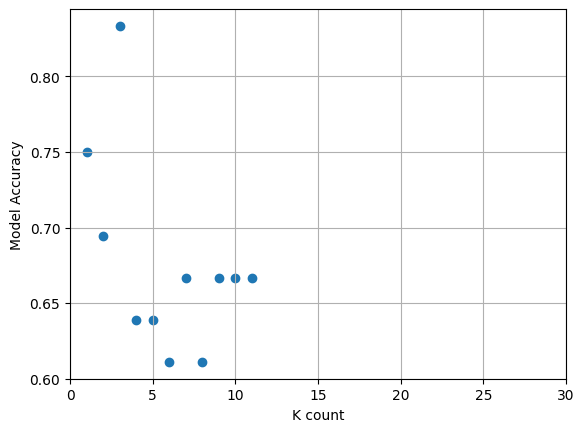

In [ ]:
k_range = range(1,12)
scoress = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scoress.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel("K count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scoress)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.show()

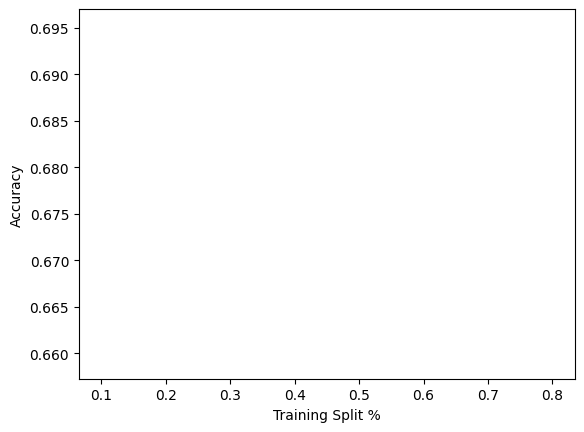

In [ ]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,0.1]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()

for test_size in test_sizes:
  scores = []
  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-test_size)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))
  plt.plot(test_size, np.mean(scores))

plt.xlabel("Training Split %")
plt.ylabel("Accuracy")
plt.show()

# **Make Predictions**

In [ ]:
prediction = knn.predict(X_test)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0])

In [ ]:
y_test

105    1
154    2
20     0
58     0
99     1
      ..
86     1
106    1
28     0
91     1
14     0
Name: target, Length: 161, dtype: int64

In [ ]:
cm = confusion_matrix(y_test, prediction)

In [ ]:
cm

array([[42,  8,  0],
       [ 2, 63,  0],
       [ 1, 45,  0]])

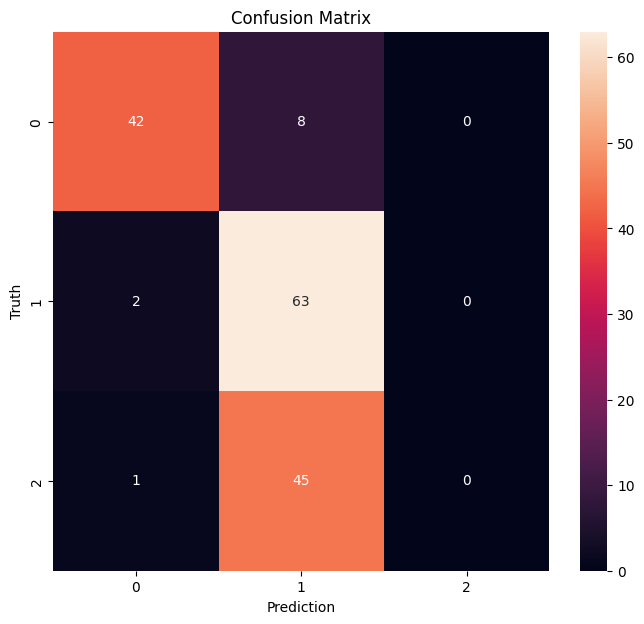

In [ ]:
plt.figure(figsize = (8,7))
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix")
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.show()